In [1]:
import pandas as pd
pd.options.mode.copy_on_write = True

In [2]:
df = pd.read_csv('data/spam.csv', encoding='Windows-1252')

In [3]:
## drop unnamed and empty columns
df = df.loc[:, ~df.columns.str.contains('unnamed', case=False)]
df.head(20)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


### In R

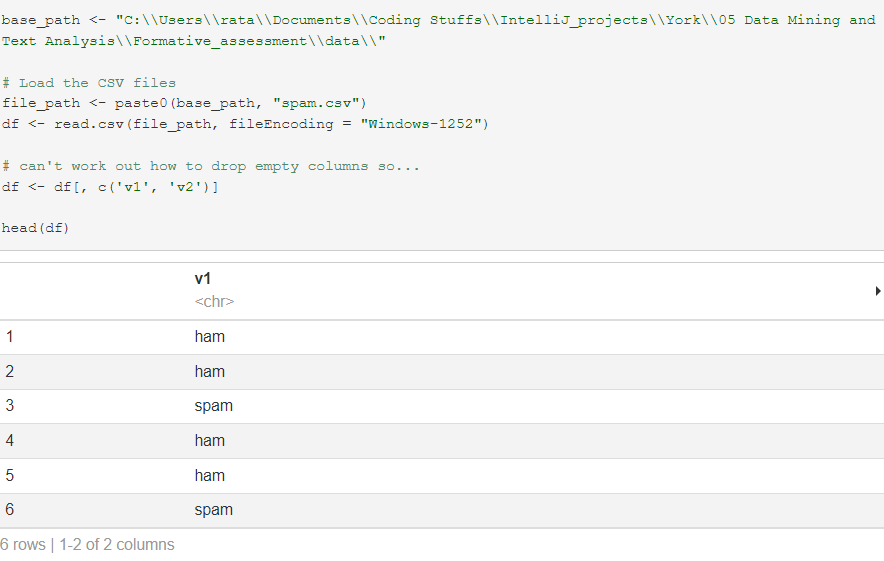

In [4]:
# clean up encoding problems
# Regular expression pattern to match non-ASCII characters (mojibakes)
pattern = r'[^\x00-\x7F]'

# Remove all mojibake characters from the 'v2_cleaned' column
df['v2_cleaned'] = df['v2'].str.replace(pattern, '', regex=True)

# found some more
df['v2_cleaned'] = df['v2_cleaned'].str.replace('&lt;#&gt;', '')
df['v2_cleaned'] = df['v2_cleaned'].str.replace('&amp;', '')
df['v2_cleaned'] = df['v2_cleaned'].str.replace('&gt;', '')
df['v2_cleaned'] = df['v2_cleaned'].str.replace('&lt;', '')


df.head()

,v1,v2,v2_cleaned
0,ham,"Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...","Nah I don't think he goes to usf, he lives aro..."


### In R

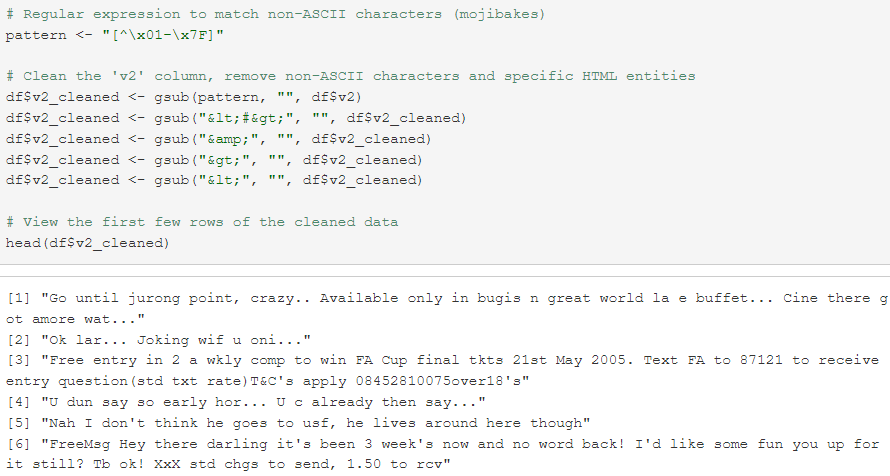

# Feature Engineering

## find links

In [5]:
# Regular expression to detect links (URLs)
link_pattern = r'(?:http[s]?://|www\.)'

# Create a new column 'has_link' where 1 indicates a link is present and 0 means no link
df['has_link'] = df['v2_cleaned'].str.contains(link_pattern, regex=True).astype(int)

df.head(20)

,v1,v2,v2_cleaned,has_link
0,ham,"Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...","Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,FreeMsg Hey there darling it's been 3 week's n...,0
6,ham,Even my brother is not like to speak with me. ...,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,WINNER!! As a valued network customer you have...,0
9,spam,Had your mobile 11 months or more? U R entitle...,Had your mobile 11 months or more? U R entitle...,0


### In R

R is index 1 based, so the links are in the same items even though the indices seem to be off by 1.

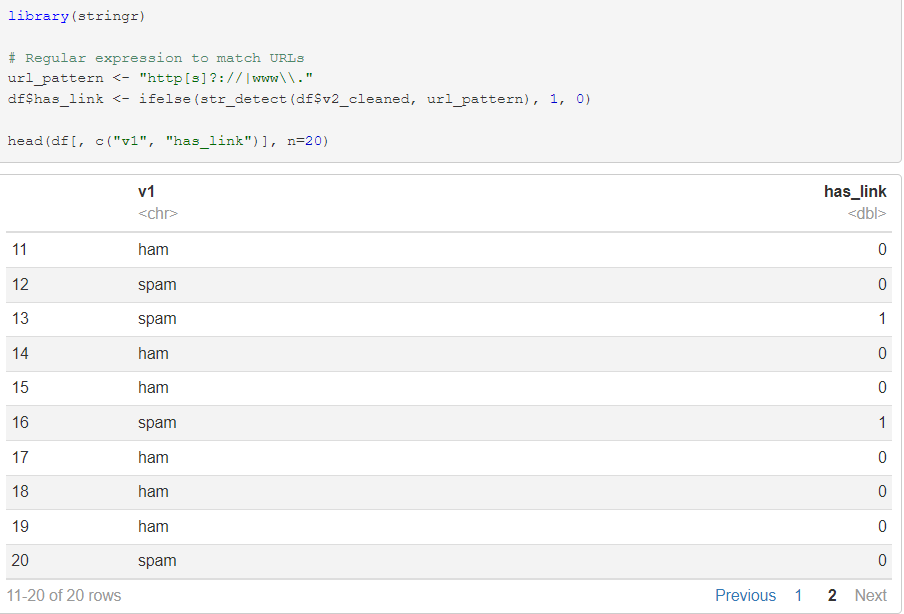

## find text length

In [6]:
df['text_length'] = df['v2_cleaned'].str.len()

df.head()

,v1,v2,v2_cleaned,has_link,text_length
0,ham,"Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,0,155
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...","Nah I don't think he goes to usf, he lives aro...",0,61


### In R

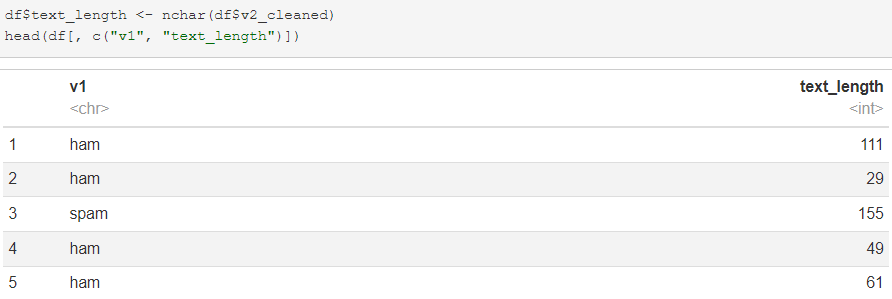

## count some punctuation and number of digits

In [7]:
# Count exclamation marks, dollar signs, pound signs, and digits
df['exclamation_count'] = df['v2_cleaned'].str.count('!')
df['digit_count'] = df['v2_cleaned'].str.count(r'\d')

df.head(6)

,v1,v2,v2_cleaned,has_link,text_length,exclamation_count,digit_count
0,ham,"Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ...",0,111,0,0
1,ham,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,0,29,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,0,155,0,25
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...,0,49,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...","Nah I don't think he goes to usf, he lives aro...",0,61,0,0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,FreeMsg Hey there darling it's been 3 week's n...,0,146,2,4


### In R

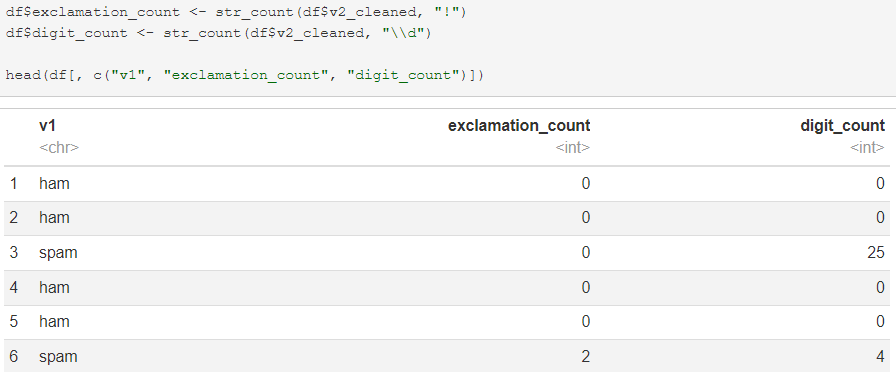

## count words in all caps

In [8]:
# Count the number of fully capitalized words
df['allcaps_count'] = df['v2_cleaned'].apply(lambda x: sum(1 for word in x.split() if word.isupper()))

df.head()

,v1,v2,v2_cleaned,has_link,text_length,exclamation_count,digit_count,allcaps_count
0,ham,"Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ...",0,111,0,0,0
1,ham,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,0,29,0,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,0,155,0,25,2
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...,0,49,0,0,2
4,ham,"Nah I don't think he goes to usf, he lives aro...","Nah I don't think he goes to usf, he lives aro...",0,61,0,0,1


### In R

This one doesn't match up with python's results. Not sure why.

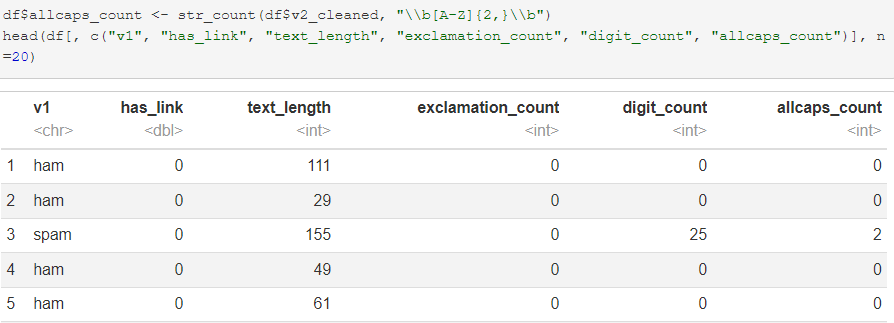

### Comparison with WEKA

The majority of the tasks above are not possible in WEKA as all spaces and punctuation must be removed before the data will even load. 

Some feature engineering tasks with numerical data, like basic arithmetic operations, are possible in WEKA using features, however more complex feature engineering must be accomplished before importing the data.